In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/output-nomfcc'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/My Drive/output-nomfcc/output-nomfcc9.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc2.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc6.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc3.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc4.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc5.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc7.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc8.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc11(1).csv
/content/drive/My Drive/output-nomfcc/output-nomfcc14(1).csv
/content/drive/My Drive/output-nomfcc/output-nomfcc15(1).csv
/content/drive/My Drive/output-nomfcc/output-nomfcc16(1).csv
/content/drive/My Drive/output-nomfcc/output-nomfcc12.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc14.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc15.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc16.csv
/content/drive/My Drive/output-nomfcc/output-nomfcc10.csv
/content/d

In [0]:
!pip3 install soundfile
!pip3 install librosa
import librosa
import soundfile as sf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("/content/drive/My Drive/output-nomfcc/output-nomfcc1.csv")
init = data.values
for i in range(2,17):
    data = np.vstack([data,pd.read_csv(f"/content/drive/My Drive/output-nomfcc/output-nomfcc{i}.csv").values])


In [0]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv("/content/drive/My Drive/tavares/file_label_dcase.csv")
df = df.sample(frac=0.15, random_state=42)
X, y = df['file'].values,df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y.shape

(1666,)

In [0]:
def get_features_from(filepath):
  PATH = f"/content/drive/My Drive/tavares/soundfiles/{filepath}"
  soundfile, samplerate = sf.read(PATH)
  soundfile = soundfile[:,0]
  # centroid, flatness, rms
  centroid = librosa.feature.spectral_centroid(y=soundfile)
  flatness = librosa.feature.spectral_flatness(y=soundfile)
  rms = librosa.feature.rms(y=soundfile) 
  return np.array([centroid.mean(), centroid.std(), flatness.mean(), flatness.std(), rms.mean(), rms.std()])


In [0]:
init_  = np.zeros((1,8))
i = 0
print(X.shape, y.shape)
for i, tup in enumerate(zip(X,y)):
  filename, label = tup 
  init_ = np.vstack([init_, np.hstack([get_features_from(filename),np.array([filename,label])]) ])
  print(i/y.shape[0])
pd.DataFrame(data=init_).to_csv("features_.csv")

In [0]:
init_ = pd.read_csv("/content/features_.csv").values

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(2)
scl = StandardScaler()
X_,y_ = init_[1:,:-2], init_[1:,-2:]
scl.fit(X_)
X_trans = scl.transform(X_)
pca.fit(X_trans)
pca_points = pca.transform(X_trans)


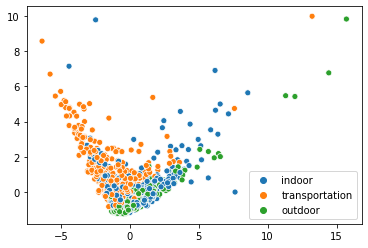

In [0]:
sns.scatterplot(x=pca_points[:,0],y=pca_points[:,1],hue=y_[:,-1])

In [0]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import LinearSVC
from pickle import dump  
X_,y_ = init_[1:,:-2], init_[1:,-2:]

bc = lambda x: 1 if x == 'transportation' else 0 
bc_vec = np.vectorize(bc)
y_ = bc_vec(y_)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_, y_, test_size=0.2, random_state=666)
scl = StandardScaler()
scl.fit(X_train_t)
X_train_t_scl = scl.transform(X_train_t)
X_test_t_scl = scl.transform(X_test_t)
model_transp = LinearSVC(C=10,class_weight='balanced' )
model_transp.fit(X_train_t_scl, y_train_t[:,-1])
print(model_transp.score(X_test_t_scl, y_test_t[:,-1]))
pred_transp = model_transp.predict(X_train_t_scl)
dump(model_transp, open('model_transp.pickle','wb'))

0.8982035928143712


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
print(classification_report(y_train_t[:,-1],pred_transp))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       983
           1       0.76      0.85      0.81       349

    accuracy                           0.89      1332
   macro avg       0.85      0.88      0.87      1332
weighted avg       0.90      0.89      0.89      1332



In [0]:
def gv(value, array):
  x = value!=array[0]
  for ov in array[1:]:
    x &= value!=ov
  return x

In [0]:
df = pd.read_csv("/content/drive/My Drive/tavares/file_label_dcase.csv")

X_indout, y_indout = df['file'].values,df['label'].values
boolarray = gv(X_indout, init_[:,-2])
X_indout = X_indout[boolarray]
y_indout = y_indout[boolarray]
X_train, X_test, y_train, y_test = train_test_split(X_indout,y_indout,test_size=0.2,random_state=42)
# y.shape


In [0]:
np.unique(boolarray,return_counts=True)

(array([False,  True]), array([1666, 9438]))

In [0]:
print("X_Train...")
X_train_values = np.vstack([X_values[y_values[:,-2]==xt] for xt in X_train])
print("X_test...")
X_test_values = np.vstack([X_values[y_values[:,-2]==xt] for xt in X_test])
print("y_Train...")
y_train_values = np.vstack([np.hstack([y_values[y_values[:,-2]==xt][:,-1] for xt in X_train])])[0,:]
print("y_Test...")
y_test_values = np.vstack([np.hstack([y_values[y_values[:,-2]==xt][:,-1] for xt in X_test])])[0,:]
print("y_Test sounds..")
y_test_sounds_ = np.vstack([np.hstack([y_values[y_values[:,-2]==xt][:,-2] for xt in X_test])])[0,:]
print("y_Train sounds..")
y_train_sounds_ = np.vstack([np.hstack([y_values[y_values[:,-2]==xt][:,-2] for xt in X_train])])[0,:]

X_Train...
X_test...
y_Train...
y_Test...
y_Test sounds..
y_Train sounds..


In [0]:
X_train_values_io = X_train_values[y_train_values != 'transportation']
X_test_values_io = X_test_values[y_test_values != 'transportation']
y_test_values_io = y_test_values[y_test_values != 'transportation']
y_train_values_io = y_train_values[y_train_values != 'transportation']
y_train_sounds_io = y_train_sounds_[y_train_values != 'transportation']
y_test_sounds_io = y_test_sounds_[y_test_values != 'transportation']
y_test_values_io

array(['indoor', 'indoor', 'indoor', ..., 'indoor', 'indoor', 'indoor'],
      dtype=object)

In [0]:
print(X_train_values_io.shape)
print(X_test_values_io.shape)
print(y_train_values_io.shape)
print(y_test_values_io.shape)
print(y_test_sounds_io.shape)

(22900, 16)
(5790, 16)
(22900,)
(5790,)
(5790,)


In [0]:
f = np.vectorize(['indoor','outdoor','transportation'].index)
y_train_values_io = f(y_train_values_io)
y_test_values_io = f(y_test_values_io)

In [0]:
y_test_values_io

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
scaler = StandardScaler()

In [0]:
scaler.fit(X_train_values_io)
scaled_X_train = scaler.transform(X_train_values_io)
scaled_X_test = scaler.transform(X_test_values_io)

In [0]:
pca = PCA(2)
tgter =np.vstack([scaled_X_train,scaled_X_test])
tgtery =np.hstack([y_train_values_io,y_test_values_io])
pca.fit(tgter)
pca_X = pca.transform(tgter)
pca.explained_variance_ratio_

array([0.31217416, 0.16222393])

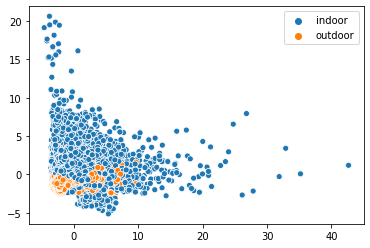

In [0]:
fy = np.vectorize(lambda i: ['indoor','outdoor'][i])
sns.scatterplot(x=pca_X[:,0],y=pca_X[:,1],hue=fy(tgtery))

In [0]:
np.unique(y_train_values_io,return_counts=True)

(array([0, 1]), array([14770,  8130]))

In [0]:
from sklearn.svm import LinearSVC
model_sel = LinearSVC()
model_sel.fit(scaled_X_train,y_train_values_io)
print(model_sel.score(scaled_X_test,y_test_values_io))
model_pred = model_sel.predict(scaled_X_test)
dump(model_sel,open('model_io.pickle','wb'))


0.9386873920552677


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
arr = confusion_matrix( y_test_values_io,model_pred)
print(arr)

[[3547  183]
 [ 172 1888]]


In [0]:
print(classification_report(y_test_values_io,model_pred ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3730
           1       0.91      0.92      0.91      2060

    accuracy                           0.94      5790
   macro avg       0.93      0.93      0.93      5790
weighted avg       0.94      0.94      0.94      5790



In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, ClassifierMixin

class FeatureGetter(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    # def __init__(self):


    def fit(self, X, y=None):

        return self
    def get_features_from(filepath):
      PATH = f"/content/drive/My Drive/tavares/soundfiles/{filepath}"
      soundfile, samplerate = sf.read(PATH)
      soundfile = soundfile[:,0]
      # centroid, flatness, rms
      centroid = librosa.feature.spectral_centroid(y=soundfile)
      flatness = librosa.feature.spectral_flatness(y=soundfile)
      rms = librosa.feature.rms(y=soundfile) 
      return np.array([centroid.mean(), centroid.std(), flatness.mean(), flatness.std(), rms.mean(), rms.std()])
    def transform(self, X):
      init = np.zeros((1,6))
      for filename in X:
        init = np.vstack([init, get_features_from(filename)])
      return init[1:,:]


pipe_trans = make_pipeline(FeatureGetter(),scl,model_transp)
pipe_trans.predict(X_test[:10])


ValueError: ignored

In [0]:
class FeatureGetterIndOut(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    # def __init__(self):


    def fit(self, X, y=None):

        return self
    def get_features_from(filepath):
      PATH = f"/content/drive/My Drive/tavares/soundfiles/{filepath}"
      soundfile, samplerate = sf.read(PATH)
      soundfile = soundfile[:,0]
      # centroid, flatness, rms
      centroid = librosa.feature.spectral_centroid(y=soundfile)
      flatness = librosa.feature.spectral_flatness(y=soundfile)
      rms = librosa.feature.rms(y=soundfile) 
      return np.array([centroid.mean(), centroid.std(), flatness.mean(), flatness.std(), rms.mean(), rms.std()])
    def transform(self, X):
      init = np.zeros((1,6))
      
      for i, filename in enumerate(X):
        
        init = np.vstack([init, self.get_features_from(filename)])
      return init[1:,:]


pipe_trans = make_pipeline(FeatureGetter(),scl,model_transp)
pipe_trans.predict(X_test[:10])


In [0]:
y_test_sounds_.shape

(10590,)

In [0]:
class PredictIndOut(BaseEstimator, ClassifierMixin):
  def __init__(self, model, scaler):
    self.model = model
    self.scaler = scaler 
  def fit(self,X,y=None): 
    return self
  
  def predict(self, X):
    y_pred = np.zeros(0)
    for filename in X:
      PATH = f"/content/drive/My Drive/tavares/soundfiles/{filename}"

      d = data[:,:-2][nd2 == PATH]
      
      d_scl = self.scaler.transform(d)
      pred = self.model.predict(d_scl)
      y_pred = np.hstack([y_pred, self.countermax(pred)])
    return y_pred
predio = PredictIndOut(model_sel, scaler)

In [0]:
accuracy_score(predio.predict(X_test[y_test != 'transportation'][:1000]),f(y_test[y_test != 'transportation'])[:1000])

0.695

(1888,)

In [0]:
'TAU-urban-acoustic-scenes-2020-3class-development/audio/metro-lyon-1201-44437-a.wav' in data[:,-2]

True

In [0]:
px = '/content/drive/My Drive/tavares/soundfiles/' + X_test

In [0]:
nl = lambda x: x if x.startswith('/content/drive/My Drive/tavares/soundfiles/') else '/content/drive/My Drive/tavares/soundfiles/'+x
vnl = np.vectorize(nl)
nd2 = vnl(data[:,-2])

In [0]:
X_test.shape

(1888,)

In [0]:
y_test
y_test_cmp = f(y_test)

In [0]:
y_test_cmp

array([0, 2, 2, ..., 2, 2, 0])

In [0]:
def get_features_from(filepath):
      PATH = f"/content/drive/My Drive/tavares/soundfiles/{filepath}"
      soundfile, samplerate = sf.read(PATH)
      soundfile = soundfile[:,0]
      # centroid, flatness, rms
      centroid = librosa.feature.spectral_centroid(y=soundfile)
      flatness = librosa.feature.spectral_flatness(y=soundfile)
      rms = librosa.feature.rms(y=soundfile) 
      return np.array([centroid.mean(), centroid.std(), flatness.mean(), flatness.std(), rms.mean(), rms.std()])
def transform( X):
  init = np.zeros((1,6))
  
  for i, filename in enumerate(X):
    print(i/X.shape[0])
    init = np.vstack([init, get_features_from(filename)])
  return init[1:,:]
x = transform(X_test)
p = pd.DataFrame(data=x)
p.to_csv("feat.csv")

In [0]:
def countermax(array):
    v, c = np.unique(array,return_counts=True)
    return v[c.argmax()]

In [0]:
from pickle import load
test_values = pd.read_csv("feat.csv")
test_values_scl = scl.transform(test_values.values)
model_transp = load(open('model_transp.pickle','rb'))
y_pred_trans = model_transp.predict(test_values_scl)

In [0]:
y_pred = np.zeros(0)
for i,filename in enumerate(X_test):
  PATH = f"/content/drive/My Drive/tavares/soundfiles/{filename}"
  d = data[:,:-2][nd2 == PATH]   
  d_scl = scaler.transform(d)
  pred = model_io.predict(d_scl)
  y_pred = np.hstack([y_pred, countermax(pred)])
  

In [0]:
model_io = load(open('model_io.pickle','rb'))

In [0]:
y_pred.shape

(1888,)

In [0]:
y_pred_trans.shape

(1888,)

In [0]:
y_pred_final = []

for t, io in zip(y_pred_trans, y_pred):
  if t == 0:
    y_pred_final.append(io)
  else:
    y_pred_final.append(2)

In [0]:
y_pred_final = np.array(y_pred_final)

In [0]:
y_test_quant = f(y_test)
y_test_quant

array([0, 2, 2, ..., 2, 2, 0])

In [0]:
y_test_quant_b = [0 if i!= 2 else 1 for i in y_test_quant ]

In [0]:
accuracy_score(y_test_quant_b, y_pred_trans)

0.8945974576271186

In [0]:

from sklearn.metrics import accuracy_score
accuracy_score(y_pred_final, y_test_quant)

0.6716101694915254

In [0]:
f(y_test_values_io) == y_test_io

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False